# Distributions - Physical

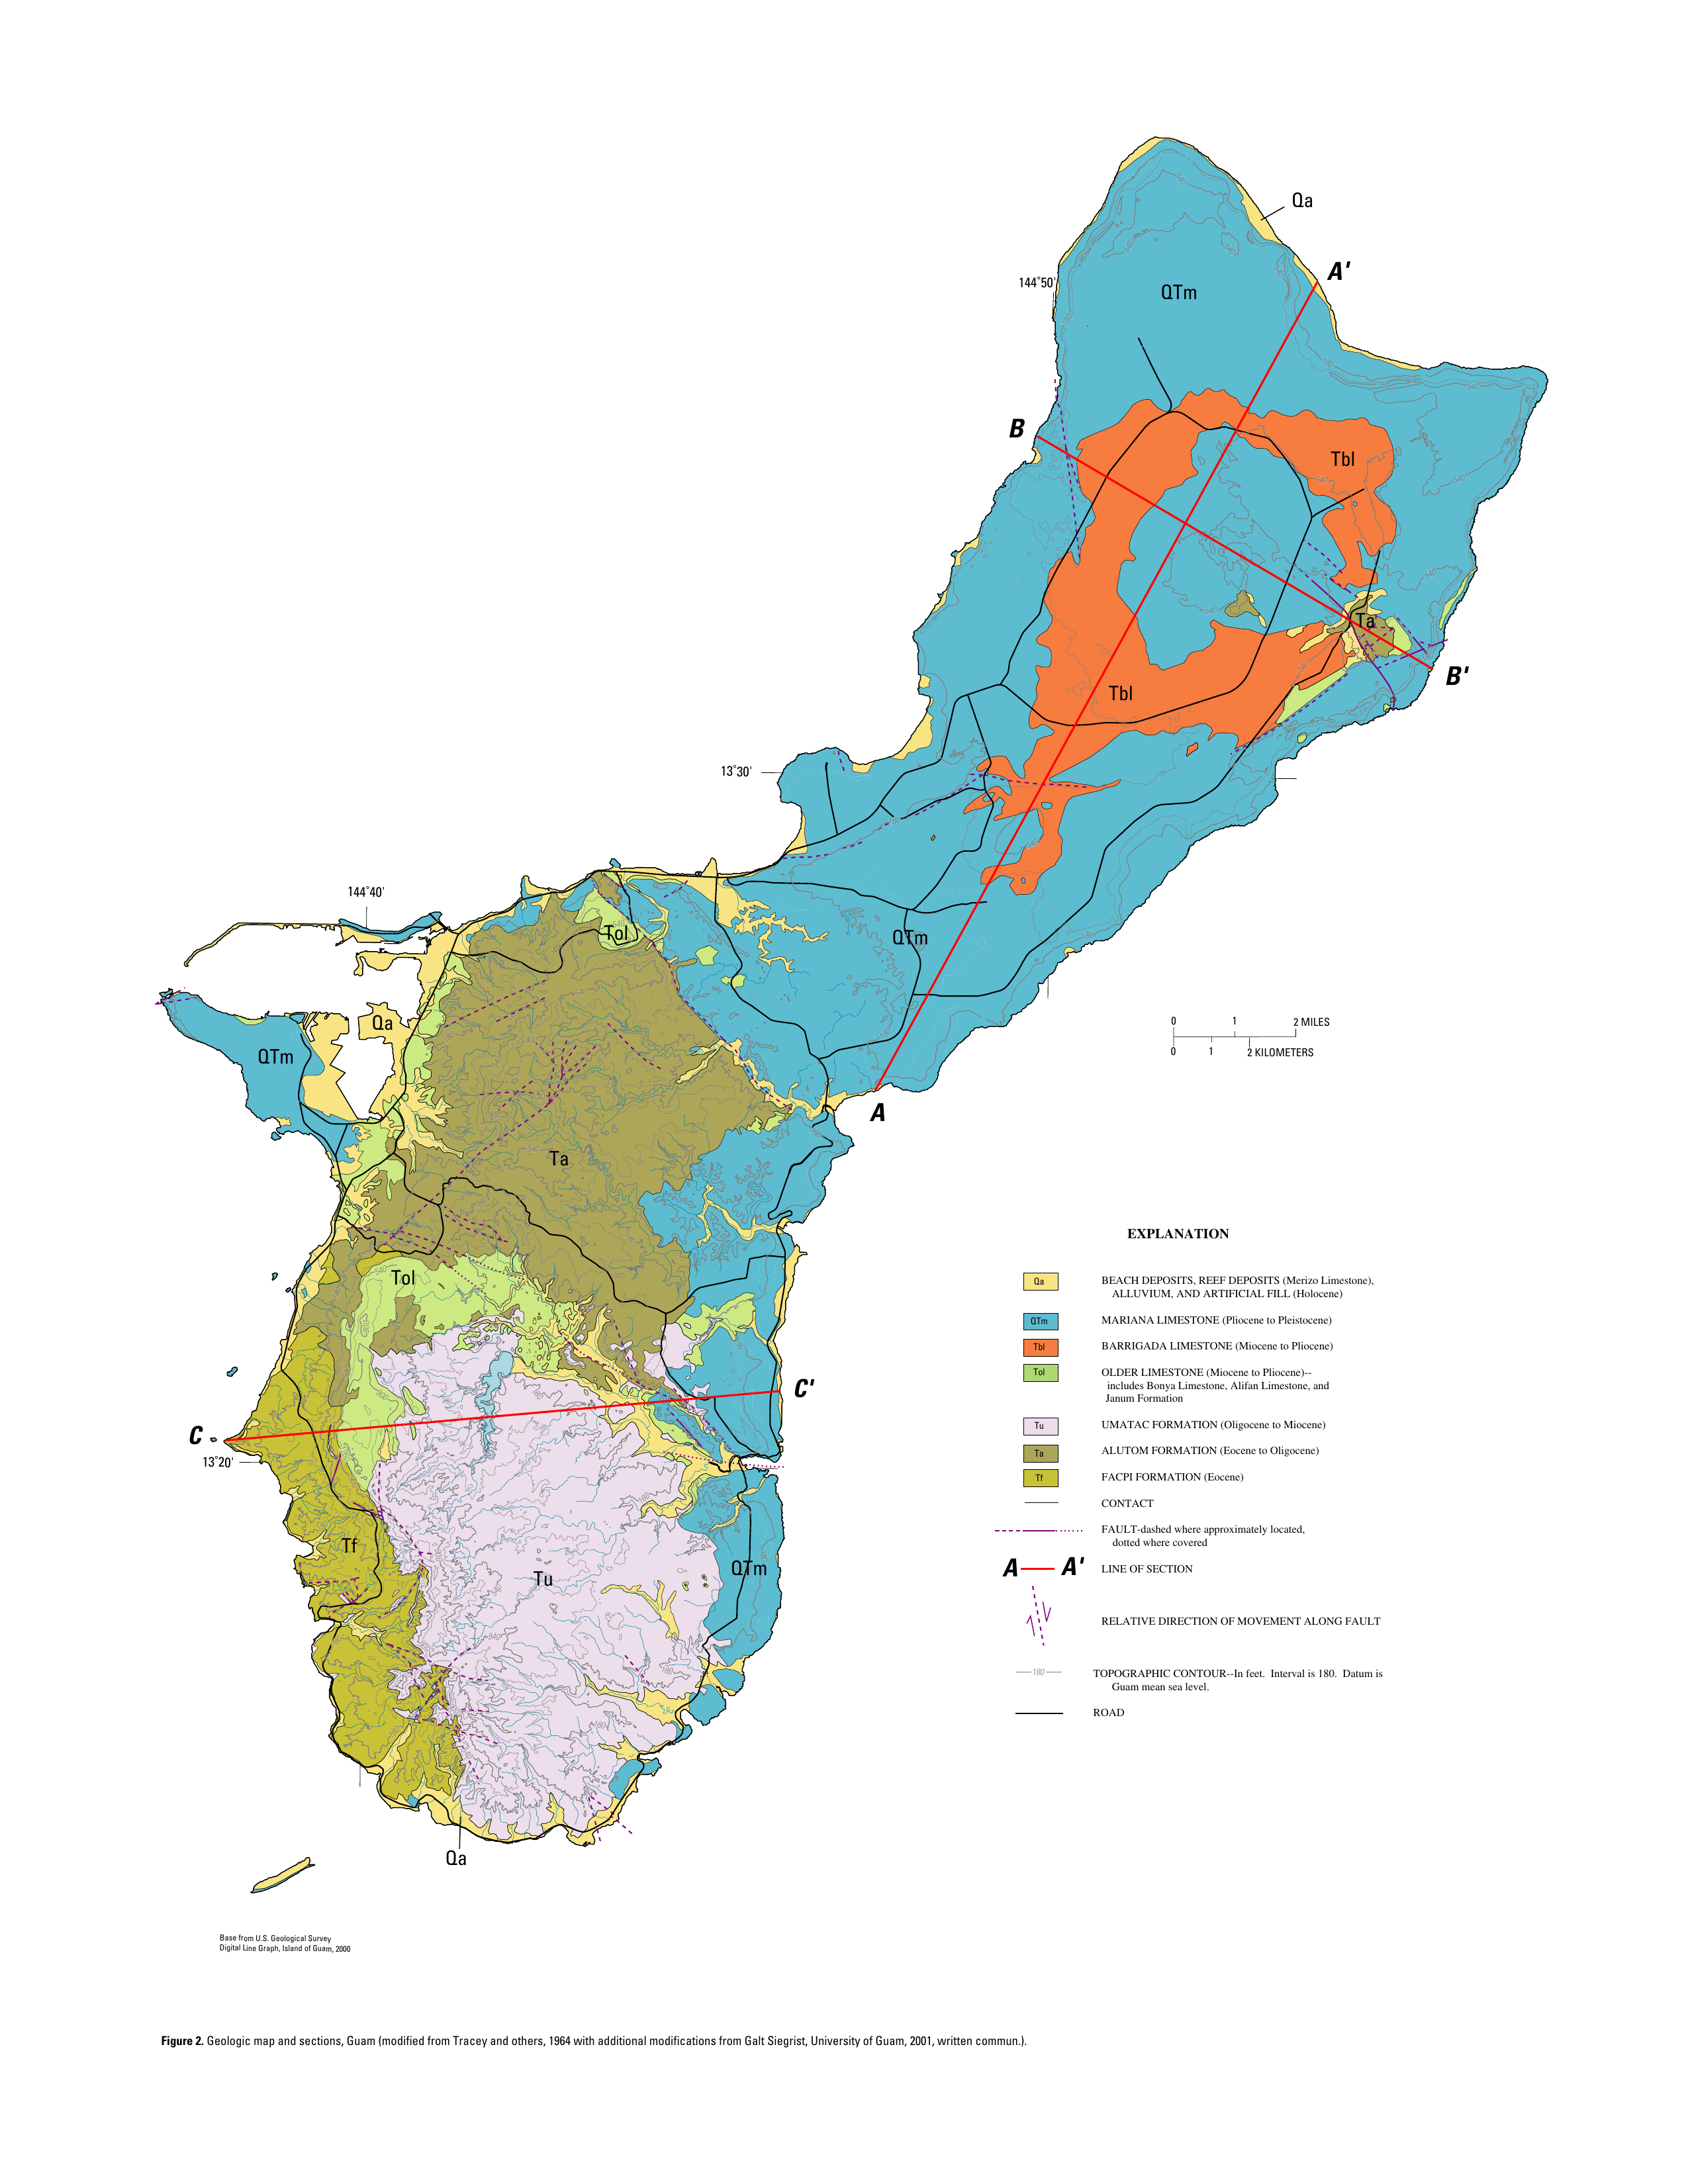

In [41]:
from PIL import Image

filename = 'geological_map.tif'
im = Image.open(filename)
display(im)

In [42]:
# Pulling legend data for later use
categories = {
    "Qa": {
        "color": "#f8e483",
        "description": "BEACH DEPOSITS, REEF DEPOSITS, ALLUVIUM, AND ARTIFICIAL FILL",
        "start": 11700,
        "end": 0,
    },
    "QTm": {
        "color": "#5ebcd1",
        "description": "MARIANA LIMESTONE",
        "start": 5.333e6,
        "end": 11700,
    },
    "Tbl": {
        "color": "#f67c3f",
        "description": "BARRIGADA LIMESTONE",
        "start": 23.03e6,
        "end": 2.58e6,
    },
    "Tol": {
        "color": "#cde981",
        "description": "OLDER LIMESTONE",
        "start": 23.03e6,
        "end": 2.58e6,
    },
    "Tu": {
        "color": "#ecdeeb",
        "description": "UMATAC FORMATION",
        "start": 33.9e6,
        "end": 5.333e6,
    },
    "Ta": {
        "color": "#ada659",
        "description": "ALUTOM FORMATION",
        "start": 56e6,
        "end": 23.03e6,
    },
    "Tf": {
        "color": "#cac236",
        "description": "FACPI FORMATION",
        "start": 56e6,
        "end": 33.9e6,
    },
}

In [43]:
# Loading a version of the map without the legend
# for accurate pixel counts and distribution

filename = 'geological_map_no_legend.tif'
im = Image.open(filename).convert('RGB')

width, height = im.size
mode = im.mode

# Show information about the original image.
print(f"Size: {width} x {height} pixels")
print(f"Mode: {mode}")

Size: 1400 x 1769 pixels
Mode: RGB


## Histogram of Colors

Calculating various statistics on the amount and location of the different colors within the map.



In [44]:
from PIL import ImageColor
from io import StringIO
from csv import writer 
import pandas as pd

pix_map = im.load()

# Using StringIO and csv writer for in-memory CSV storage
# quick appends compared to directly dealing with a growing dataframe
data = StringIO()
csv_writer = writer(data)
csv_writer.writerow(["Category", "X", "Y"])


for k, v in categories.items():
    v["sum"] = 0
    v["v_hist"] = [0] * height
    v["h_hist"] = [0] * width
    color = ImageColor.getrgb(v["color"])
    for x in range(width):
        for y in range(height):
            pixel = pix_map[x, y]
            if color == pixel:
                v["sum"] += 1
                v["h_hist"][x] += 1
                v["v_hist"][y] += 1
                csv_writer.writerow([k, x, y])
    print(f"{k} {v['sum']}")
    
data.seek(0)
df = pd.read_csv(data)
print(df.shape)

Qa 28268
QTm 297694
Tbl 59128
Tol 22185
Tu 86066
Ta 80000
Tf 25010
(598351, 3)


In [45]:
%matplotlib inline

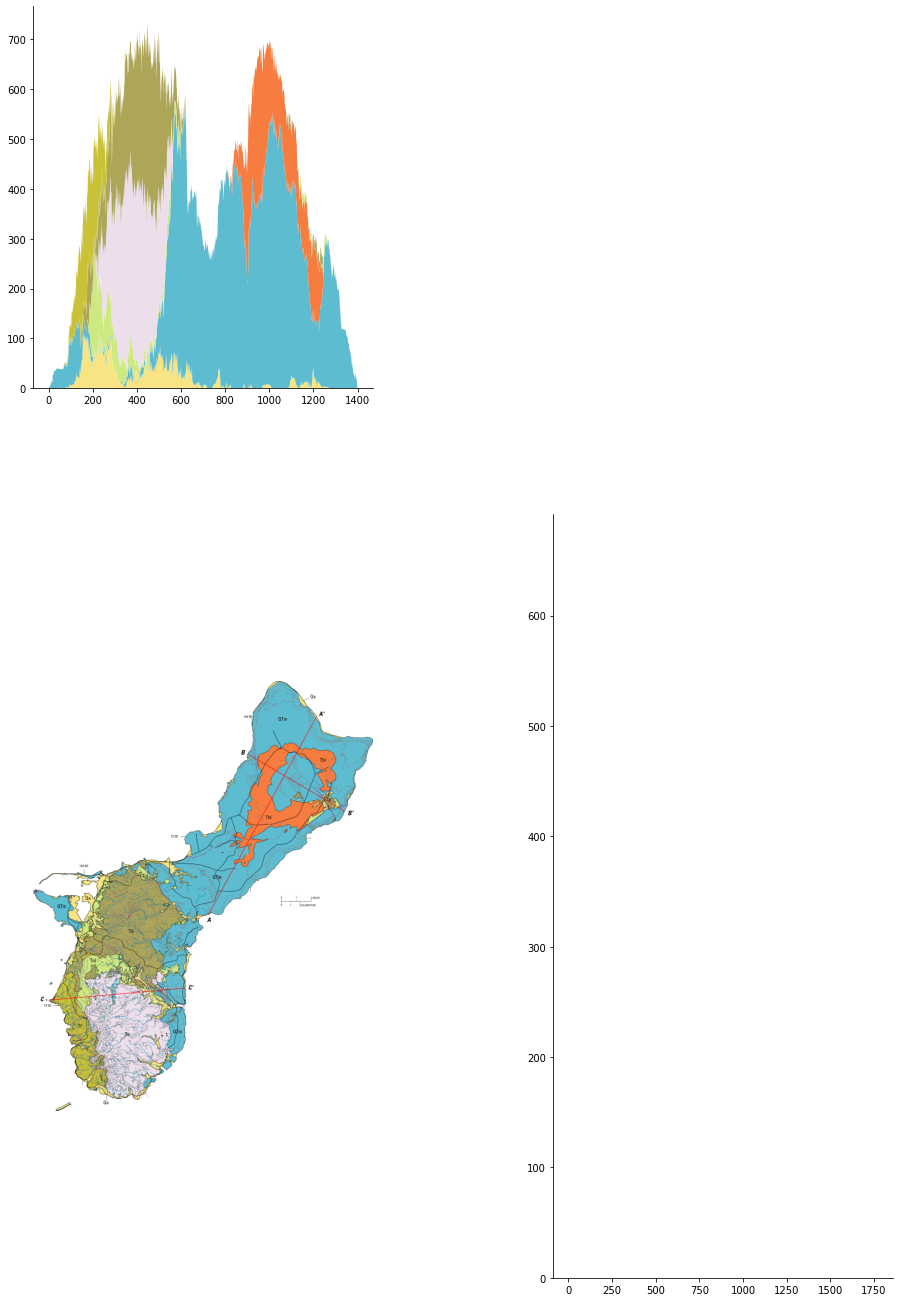

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import transforms

img = mpimg.imread(filename)
figsize = plt.figaspect(height / width)

fig, axs = plt.subplots(2, 2,
                        figsize=figsize,
                        gridspec_kw={'width_ratios': [1, 1],  # column ratio
                                    'height_ratios': [1, 2]})  # row ratio
fig.tight_layout()
fig.set_figwidth(15)
fig.set_figheight(20)

# Bottom left - image
axs[1, 0].imshow(img)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['left'].set_visible(False)
axs[1, 0].spines['bottom'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

# Top Left - horizontal stacked area chart
y = [v["h_hist"] for k, v in categories.items()]
colors = [v["color"] for k, v in categories.items()]
axs[0, 0].stackplot(range(width), *y, colors=colors)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

# Bottom Right - vertical stacked area chart
y = [v["v_hist"] for k, v in categories.items()]
colors = [v["color"] for k, v in categories.items()]
rot = transforms.Affine2D().rotate_deg(90)
axs[1, 1].stackplot(range(height), *y, colors=colors, transform=rot)
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)


# Top right - Pie Chart of breakdown
fig.delaxes(axs[0, 1])
plt.show()